## This notebook provides clustering analysis for Covid-19 Demographics project

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.manifold import TSNE,LocallyLinearEmbedding


from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
%matplotlib inline

#%matplotlib notebook
pd.options.display.max_columns = 100
pd.options.display.max_rows = 250
plt.rcParams["figure.figsize"] = [15, 10]

In [3]:
df=pd.read_excel('Final_cleaned_scaled_5_21.xlsx')

In [4]:
df.head()

,Country Name,region,sub-region,Country Code,Income group,Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),GDP(USD - billion),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of general government expenditure),Domestic general government health expenditure per capita (current US$),Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$),External health expenditure (% of current health expenditure),External health expenditure per capita (current US$),SI_mean1,SI_mean2,min_SI,max_SI,Days_diff,growth_1,growth_2
0,Afghanistan,Asia,Southern Asia,AFG,Low income,0.803525,0.043767,0.007011,0.026509,0.026449,0.026482,0.087618,0.000916,0.004667,0.544648,0.000000,0.007256,0.008444,0.000052,0.970848,0.011661,0.324983,0.038880,0.550713,0.349535,0.333392,0.675709,0.237624,0.001316,0.009175
1,Albania,Europe,Southern Europe,ALB,Upper middle income,0.135111,0.566350,0.012664,0.001986,0.001957,0.001926,0.079523,0.000708,0.025532,0.312771,0.398797,0.173100,0.206896,0.013595,0.720274,0.042577,0.012294,0.006970,0.711830,0.525025,0.000000,0.837798,0.138614,0.000865,0.003027
2,Algeria,Africa,Northern Africa,DZA,Upper middle income,0.485699,0.220484,0.002163,0.030005,0.030448,0.029500,0.072090,0.008431,0.028194,0.309498,0.688632,0.300792,0.239367,0.021516,0.388782,0.022530,0.000411,0.000213,0.698880,0.366403,0.166783,0.945970,0.287129,0.003403,0.023632
3,Andorra,Europe,Southern Europe,AND,High income,0.053246,0.803976,0.019778,0.000030,0.007571,0.006507,0.046064,0.000131,0.376144,0.555845,0.484360,0.344595,0.326316,0.232989,0.628525,0.532639,0.004732,0.015008,0.427950,0.124223,0.166783,0.513507,0.069307,0.000878,0.006142
4,Angola,Africa,Sub-Saharan Africa,AGO,Lower middle income,0.914152,0.026430,0.003062,0.022174,0.022966,0.021337,0.053001,0.005121,0.009628,0.059747,0.429414,0.062405,0.098969,0.004893,0.645943,0.013140,0.067718,0.013463,0.260342,0.286854,0.083304,0.675709,0.475248,0.000036,0.000308


In [5]:
X=df.loc[:,'Population aged 0 to 14 years old (percentage)':'growth_2']
X=X.drop(columns=['SI_mean1','growth_2'])

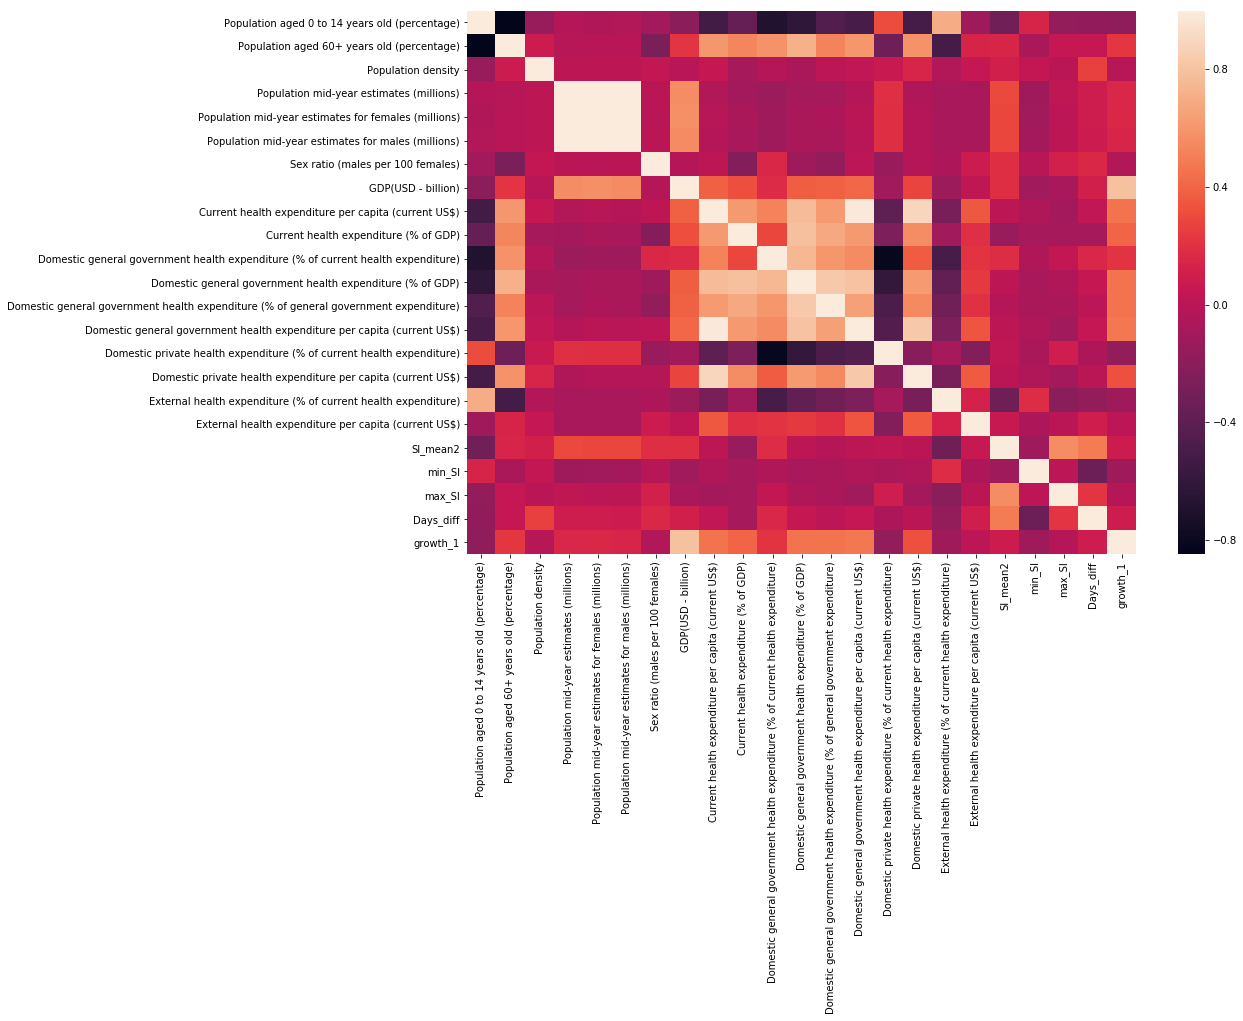

In [88]:
## To visualize collinerity
sns.heatmap(X.corr())

In [89]:
X.columns

Index(['Population aged 0 to 14 years old (percentage)',
       'Population aged 60+ years old (percentage)', 'Population density',
       'Population mid-year estimates (millions)',
       'Population mid-year estimates for females (millions)',
       'Population mid-year estimates for males (millions)',
       'Sex ratio (males per 100 females)', 'GDP(USD - billion)',
       'Current health expenditure per capita (current US$)',
       'Current health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure (% of current health expenditure)',
       'Domestic private health expenditure per capita (current US$)',
       'External health expend

In [90]:
X=X.drop(columns=[ 'Population aged 0 to 14 years old (percentage)',
                  'Population mid-year estimates for females (millions)',
    'Current health expenditure per capita (current US$)',
    'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure (% of current health expenditure)',
       'Domestic private health expenditure per capita (current US$)',
       'External health expenditure (% of current health expenditure)',
       'External health expenditure per capita (current US$)'])

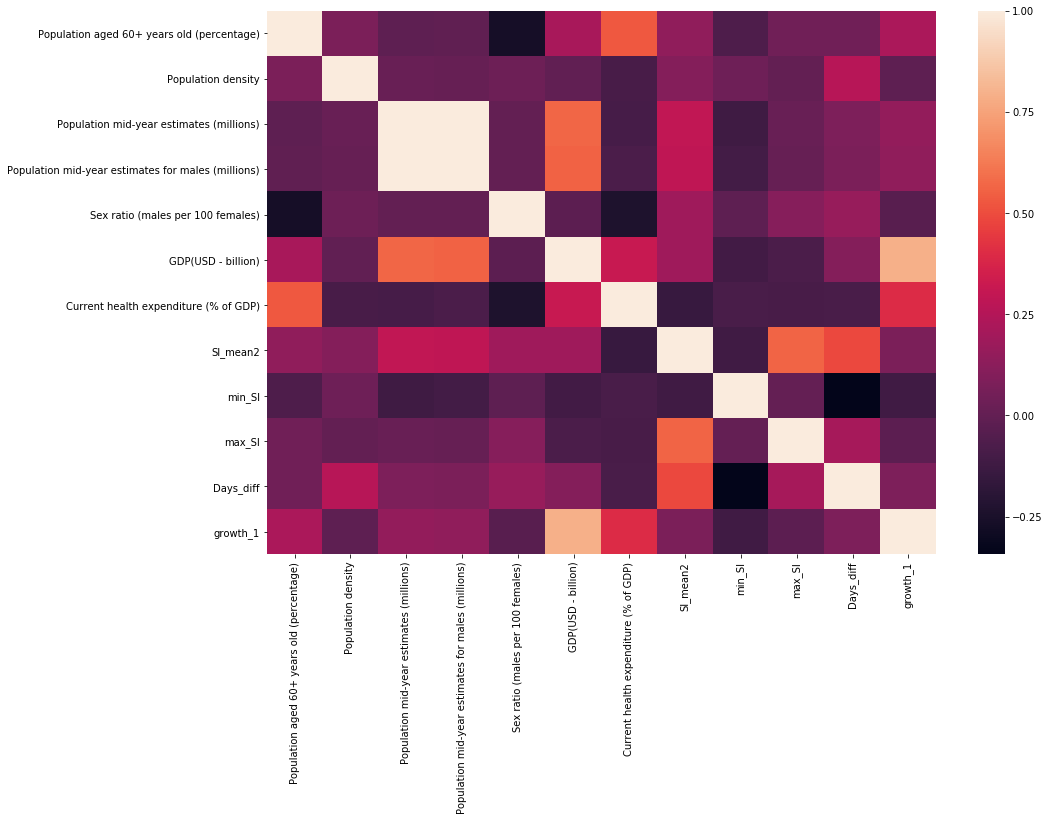

In [91]:
sns.heatmap(X.corr())

In [92]:
X.head()

,Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),GDP(USD - billion),Current health expenditure (% of GDP),SI_mean2,min_SI,max_SI,Days_diff,growth_1
0,0.043767,0.007011,0.026509,0.026482,0.087618,0.000916,0.544648,0.349535,0.333392,0.675709,0.237624,0.001316
1,0.566350,0.012664,0.001986,0.001926,0.079523,0.000708,0.312771,0.525025,0.000000,0.837798,0.138614,0.000865
2,0.220484,0.002163,0.030005,0.029500,0.072090,0.008431,0.309498,0.366403,0.166783,0.945970,0.287129,0.003403
3,0.803976,0.019778,0.000030,0.006507,0.046064,0.000131,0.555845,0.124223,0.166783,0.513507,0.069307,0.000878
4,0.026430,0.003062,0.022174,0.021337,0.053001,0.005121,0.059747,0.286854,0.083304,0.675709,0.475248,0.000036


In [93]:
pca = PCA(n_components=3)

pca.fit(X)
x_pca = pca.transform(X)

In [94]:
dfX=pd.DataFrame(df['Country Name'])
dfX['pca1']=x_pca[:,0]
dfX['pca2']=x_pca[:,1]
dfX['pca3']=x_pca[:,2]

In [95]:
fig = px.scatter(dfX, x="pca1", y="pca2",
                 hover_name="Country Name")

fig.show()

In [96]:
fig = px.scatter_3d(dfX, x='pca1', y='pca2', z='pca3',hover_name='Country Name')
fig.show()

In [124]:
kpca = KernelPCA(n_components=3,kernel='rbf',gamma=0.25)

kpca.fit(X)
x_kpca = kpca.transform(X)

In [125]:
dfX['kpca1']=x_kpca[:,0]
dfX['kpca2']=x_kpca[:,1]
dfX['kpca3']=x_kpca[:,2]

In [126]:
fig = px.scatter(dfX, x="kpca1", y="kpca2",
                 hover_name="Country Name")

fig.show()

In [127]:
fig = px.scatter_3d(dfX, x='kpca1', y='kpca2', z='kpca3',hover_name='Country Name')
fig.show()

In [128]:
ica = FastICA(n_components=3)

ica.fit(X)
x_ica = ica.transform(X)

In [129]:

dfX['ica1']=x_ica[:,0]
dfX['ica2']=x_ica[:,1]
dfX['ica3']=x_ica[:,2]

In [130]:
fig = px.scatter(dfX, x="ica1", y="ica2",
                 hover_name="Country Name")

fig.show()

In [131]:
fig = px.scatter_3d(dfX, x='ica1', y='ica2', z='ica3',hover_name='Country Name')
fig.show()

In [132]:
lle= LocallyLinearEmbedding(n_components=3)
x_lle= lle.fit_transform(X)

In [133]:
dfX['lle1']=x_lle[:,0]
dfX['lle2']=x_lle[:,1]
dfX['lle3']=x_lle[:,2]

In [135]:
fig = px.scatter(dfX, x="lle1", y="lle2",
                 hover_name="Country Name")

fig.show()

In [136]:
fig = px.scatter_3d(dfX, x="lle1", y="lle2",z='lle3',
                 hover_name="Country Name")

fig.show()

In [146]:
tsne = TSNE(n_components=3, verbose=0, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

In [147]:
dfX['first']=tsne_results[:,0]
dfX['second']=tsne_results[:,1]
dfX['third']=tsne_results[:,2]

In [142]:
fig = px.scatter(dfX, x="first", y="second",
                 hover_name="Country Name")

fig.show()

In [148]:
fig = px.scatter_3d(dfX, x='first', y='second', z='third',hover_name='Country Name')
fig.show()

## Clustering the data using DBSCAN, Agglomerative Clustering and Spectral Clustering

In [214]:
dfname=pd.DataFrame(df['Country Name'])
dfname['iso_alpha']=df['Country Code']
dfname[['Population aged 60+ years old (percentage)', 'Population density',
       'Population mid-year estimates (millions)',
       'Population mid-year estimates for males (millions)',
       'Sex ratio (males per 100 females)', 'GDP(USD - billion)',
       'Current health expenditure (% of GDP)', 'SI_mean2', 'min_SI', 'max_SI',
       'Days_diff', 'growth_1']]=X[['Population aged 60+ years old (percentage)', 'Population density',
       'Population mid-year estimates (millions)',
       'Population mid-year estimates for males (millions)',
       'Sex ratio (males per 100 females)', 'GDP(USD - billion)',
       'Current health expenditure (% of GDP)', 'SI_mean2', 'min_SI', 'max_SI',
       'Days_diff', 'growth_1']]

In [215]:
dfname.head()

,Country Name,iso_alpha,Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),GDP(USD - billion),Current health expenditure (% of GDP),SI_mean2,min_SI,max_SI,Days_diff,growth_1
0,Afghanistan,AFG,0.043767,0.007011,0.026509,0.026482,0.087618,0.000916,0.544648,0.349535,0.333392,0.675709,0.237624,0.001316
1,Albania,ALB,0.566350,0.012664,0.001986,0.001926,0.079523,0.000708,0.312771,0.525025,0.000000,0.837798,0.138614,0.000865
2,Algeria,DZA,0.220484,0.002163,0.030005,0.029500,0.072090,0.008431,0.309498,0.366403,0.166783,0.945970,0.287129,0.003403
3,Andorra,AND,0.803976,0.019778,0.000030,0.006507,0.046064,0.000131,0.555845,0.124223,0.166783,0.513507,0.069307,0.000878
4,Angola,AGO,0.026430,0.003062,0.022174,0.021337,0.053001,0.005121,0.059747,0.286854,0.083304,0.675709,0.475248,0.000036


In [216]:

dbscan = DBSCAN(eps=0.25, min_samples =5)
clusters = dbscan.fit_predict(X)
dfname['group']=clusters

In [217]:
#dff = px.data.gapminder()
fig = px.choropleth(dfname, locations="iso_alpha", color='group', hover_name="Country Name",
                projection="natural earth")
fig.show()

In [254]:
x = dfname['group']

fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['SI_mean2'],
    x=x,
    name='SI_mean',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['min_SI'],
    x=x,
    name='min_SI',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['max_SI'],
    x=x,
    name='max_SI',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Days_diff'],
    x=x,
    name='Days_diff',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['growth_1'],
    x=x,
    name='growth',
    marker_color='#bcbd22'
))

fig.update_layout(
    title={
        'text': "Analysis on the DBSCAN Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()

x = dfname['group']

fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['Population aged 60+ years old (percentage)'],
    x=x,
    #boxpoints=False,
    name='Population aged 60+ years old (percentage)',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['Population density'],
    x=x,
    #boxpoints=False,
    name='Population density',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates (millions)'],
    x=x,
    name='Population mid-year estimates (millions)',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates for males (millions)'],
    x=x,
    name='Population mid-year estimates for males (millions)',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['Sex ratio (males per 100 females)'],
    x=x,
    name='Sex ratio (males per 100 females)',
    marker_color='#bcbd22'
))
fig.add_trace(go.Box(
    y=dfname['GDP(USD - billion)'],
    x=x,
    name='GDP(USD - billion)',
    marker_color='#17becf'
))

fig.add_trace(go.Box(
    y=dfname['Current health expenditure (% of GDP)'],
    x=x,
    name='Current health expenditure (% of GDP)',
    marker_color='#9467bd'
))

fig.update_layout(
    title={
        'text': "Demographics Features Analysis on DBSCAN Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Demographics Features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()

## Cluster list table : DBSCAN

In [261]:
pd.DataFrame(dfname[['Country Name','group']].sort_values(by='group'))

,Country Name,group
0,Afghanistan,-1
80,Mauritius,-1
79,Mauritania,-1
78,Mali,-1
76,Malawi,-1
72,Lebanon,-1
71,Lao PDR,-1
69,Kuwait,-1
136,Zambia,-1
67,"Korea, Rep.",-1


In [167]:
import plotly.graph_objects as go

In [212]:
X.head()

,Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),GDP(USD - billion),Current health expenditure (% of GDP),SI_mean2,min_SI,max_SI,Days_diff,growth_1
0,0.043767,0.007011,0.026509,0.026482,0.087618,0.000916,0.544648,0.349535,0.333392,0.675709,0.237624,0.001316
1,0.566350,0.012664,0.001986,0.001926,0.079523,0.000708,0.312771,0.525025,0.000000,0.837798,0.138614,0.000865
2,0.220484,0.002163,0.030005,0.029500,0.072090,0.008431,0.309498,0.366403,0.166783,0.945970,0.287129,0.003403
3,0.803976,0.019778,0.000030,0.006507,0.046064,0.000131,0.555845,0.124223,0.166783,0.513507,0.069307,0.000878
4,0.026430,0.003062,0.022174,0.021337,0.053001,0.005121,0.059747,0.286854,0.083304,0.675709,0.475248,0.000036


In [228]:
agg=AgglomerativeClustering(n_clusters=5)
clustering = agg.fit(X)
dfname['group2']=clustering.labels_

In [229]:
fig = px.choropleth(dfname, locations="iso_alpha", color='group2', hover_name="Country Name",
                projection="natural earth")
fig.show()

In [255]:
x = dfname['group2']

fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['SI_mean2'],
    x=x,
    name='SI_mean',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['min_SI'],
    x=x,
    name='min_SI',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['max_SI'],
    x=x,
    name='max_SI',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Days_diff'],
    x=x,
    name='Days_diff',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['growth_1'],
    x=x,
    name='growth',
    marker_color='#bcbd22'
))

fig.update_layout(
    title={
        'text': "Analysis on the Agglomerative Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()

x = dfname['group']

fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['Population aged 60+ years old (percentage)'],
    x=x,
    #boxpoints=False,
    name='Population aged 60+ years old (percentage)',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['Population density'],
    x=x,
    #boxpoints=False,
    name='Population density',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates (millions)'],
    x=x,
    name='Population mid-year estimates (millions)',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates for males (millions)'],
    x=x,
    name='Population mid-year estimates for males (millions)',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['Sex ratio (males per 100 females)'],
    x=x,
    name='Sex ratio (males per 100 females)',
    marker_color='#bcbd22'
))
fig.add_trace(go.Box(
    y=dfname['GDP(USD - billion)'],
    x=x,
    name='GDP(USD - billion)',
    marker_color='#17becf'
))

fig.add_trace(go.Box(
    y=dfname['Current health expenditure (% of GDP)'],
    x=x,
    name='Current health expenditure (% of GDP)',
    marker_color='#9467bd'
))

fig.update_layout(
    title={
        'text': "Demographics Features Analysis on Agglomerative Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Demographics Features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()

## Cluster list table : Agglomerative Clustering

In [262]:
pd.DataFrame(dfname[['Country Name','group2']].sort_values(by='group2'))

,Country Name,group2
104,Russian Federation,0
43,France,0
100,Poland,0
46,Germany,0
108,Serbia,0
111,Singapore,0
30,Cuba,0
29,Croatia,0
116,Spain,0
54,Iceland,0


In [234]:
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize",random_state=0).fit(X)
dfname['group3']=clustering.labels_


In [235]:
fig = px.choropleth(dfname, locations="iso_alpha", color='group3', hover_name="Country Name",
                projection="natural earth")
fig.show()

In [256]:
x = dfname['group3']

fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['SI_mean2'],
    x=x,
    name='SI_mean',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['min_SI'],
    x=x,
    name='min_SI',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['max_SI'],
    x=x,
    name='max_SI',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Days_diff'],
    x=x,
    name='Days_diff',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['growth_1'],
    x=x,
    name='growth',
    marker_color='#bcbd22'
))

fig.update_layout(
    title={
        'text': "Analysis on the Spectral Clustering Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()



fig = go.Figure()

fig.add_trace(go.Box(
    y=dfname['Population aged 60+ years old (percentage)'],
    x=x,
    #boxpoints=False,
    name='Population aged 60+ years old (percentage)',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=dfname['Population density'],
    x=x,
    #boxpoints=False,
    name='Population density',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates (millions)'],
    x=x,
    name='Population mid-year estimates (millions)',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=dfname['Population mid-year estimates for males (millions)'],
    x=x,
    name='Population mid-year estimates for males (millions)',
    marker_color='#e377c2'
))
fig.add_trace(go.Box(
    y=dfname['Sex ratio (males per 100 females)'],
    x=x,
    name='Sex ratio (males per 100 females)',
    marker_color='#bcbd22'
))
fig.add_trace(go.Box(
    y=dfname['GDP(USD - billion)'],
    x=x,
    name='GDP(USD - billion)',
    marker_color='#17becf'
))

fig.add_trace(go.Box(
    y=dfname['Current health expenditure (% of GDP)'],
    x=x,
    name='Current health expenditure (% of GDP)',
    marker_color='#9467bd'
))

fig.update_layout(
    title={
        'text': "Demographics Features Analysis on Spectral Clustering Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Demographics Features',
    boxmode='group' # group together boxes of the different traces for each value of x
)

fig.show()

## Cluster list table : Spectral Clustering

In [264]:
pd.DataFrame(dfname[['Country Name','group3']].sort_values(by='group3'))

,Country Name,group3
0,Afghanistan,0
35,Dominica,0
36,Dominican Republic,0
38,"Egypt, Arab Rep.",0
40,Estonia,0
44,Gabon,0
45,"Gambia, The",0
52,Honduras,0
58,Iraq,0
64,Jordan,0
